# AIML MODULE PROJECT - Meghna

## Supervised Learning

---

### Part A

---

**Step 1. Data Understanding**

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Read the CSV files into DataFrames

normal = pd.read_csv('/Users/meghnarana/Documents/Supervised Learning Project/Normal.csv')
type_h = pd.read_csv('/Users/meghnarana/Documents/Supervised Learning Project/Type_H.csv')
type_s = pd.read_csv('/Users/meghnarana/Documents/Supervised Learning Project/Type_S.csv')

In [3]:
# Display the normal dataframe

normal.head(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
6,50.913101,6.677000,30.896522,44.236102,118.151531,-1.057986,Normal
7,38.126589,6.557617,50.445075,31.568971,132.114805,6.338199,Normal
8,51.624672,15.969344,35.000000,35.655328,129.385308,1.009228,Nrmal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,Nrmal


In [4]:
# Display the type_h dataframe

type_h.head(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [5]:
# Display the type_s dataframe

type_s.head(10)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S
5,83.933009,41.286305,62.000000,42.646703,115.012334,26.588100,Type_S
6,78.491730,22.181798,60.000000,56.309932,118.530327,27.383213,Type_S
7,75.649731,19.339799,64.148685,56.309932,95.903629,69.551303,Type_S
8,72.076278,18.946176,51.000000,53.130102,114.213013,1.010041,Type_S
9,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Type_S


In [6]:
# Check for missing values of normal

normal.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [7]:
# Check for missing values of type_h

type_h.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [8]:
# Check for missing values of type_s

type_s.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [9]:
# Print the shape of each DataFrame

print("Shape of normal:", normal.shape)
print("Shape of type_h:", type_h.shape)
print("Shape of type_s:", type_s.shape)

Shape of normal: (100, 7)
Shape of type_h: (60, 7)
Shape of type_s: (150, 7)


In [10]:
# Print the columns of each DataFrame

print("Columns of normal:", normal.columns.tolist())
print("Columns of type_h:", type_h.columns.tolist())
print("Columns of type_s:", type_s.columns.tolist())

Columns of normal: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Columns of type_h: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
Columns of type_s: ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


In [11]:
# Printing data types of columns in DataFrames

print("Data Types of normal:")
print(normal.dtypes)

print("Data Types of type_h:")
print(type_h.dtypes)

print("Data Types of type_s:")
print(type_s.dtypes)

Data Types of normal:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Data Types of type_h:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Data Types of type_s:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


The column names of all three DataFrames (Normal, Type_h, and Type_s) are identical. Here are the observations regarding their column names:

1. All three DataFrames have the same column names, which are: 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', and 'Class'.

2. The uniformity of column names suggests that these DataFrames likely represent similar or related data with consistent attributes or features.

3. The 'Class' column in all three DataFrames indicates that these DataFrames may be associated with classification tasks or contain information about different classes or categories.

In summary, the consistency in column names across all three DataFrames indicates that they likely represent related datasets with the same structure and may be suitable for comparative analysis or modeling tasks.

In [12]:
# Count unique values in 'Class' for DataFrames

class_counts_normal = normal['Class'].value_counts()
class_counts_type_h = type_h['Class'].value_counts()
class_counts_type_s = type_s['Class'].value_counts()

print("Variation in 'Class' feature for normal:")
print(class_counts_normal)

print("\nVariation in 'Class' feature for type_h:")
print(class_counts_type_h)

print("\nVariation in 'Class' feature for type_s:")
print(class_counts_type_s)

Variation in 'Class' feature for normal:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64

Variation in 'Class' feature for type_h:
Class
Type_H    37
type_h    23
Name: count, dtype: int64

Variation in 'Class' feature for type_s:
Class
Type_S    133
tp_s       17
Name: count, dtype: int64


Here are the observations for each DataFrame:

**For Normal:**
- There are two variations in the 'Class' feature: 'Normal' and 'Nrmal'.
- 'Normal' occurs 73 times.
- 'Nrmal' occurs 27 times.

**For Type_h:**
- There are two variations in the 'Class' feature: 'Type_H' and 'type_h'.
- 'Type_H' occurs 37 times.
- 'type_h' occurs 23 times.

**For Type_s:**
- There are two variations in the 'Class' feature: 'Type_S' and 'tp_s'.
- 'Type_S' occurs 133 times.
- 'tp_s' occurs 17 times.

These observations suggest that the 'Class' feature in each DataFrame has some variations in the labeling or formatting of class names. In the case of 'Normal' and 'Type_H', there are variations in capitalization ('Normal' vs. 'Nrmal' and 'Type_H' vs. 'type_h'). Similarly, in the 'Type_s' DataFrame, there is a capitalization variation ('Type_S' vs. 'tp_s').

**Step 2. Data Preparation and Exploration**

In [13]:
# Unify the 'Class' feature variations in each DataFrame

normal['Class'] = normal['Class'].str.lower()
type_h['Class'] = type_h['Class'].str.lower()
type_s['Class'] = type_s['Class'].str.lower()

normal['Class'] = normal['Class'].replace({'nrmal': 'normal'})
type_h['Class'] = type_h['Class'].replace({'type_h': 'type_h'})
type_s['Class'] = type_s['Class'].replace({'tp_s': 'type_s'})

In [14]:
# Concatenate all three DataFrames vertically to form a single DataFrame

combined = pd.concat([normal, type_h, type_s], ignore_index=True)

In [15]:
# Display the shape of the combined DataFrame

print("Shape of the Combined DataFrame:", combined.shape)

Shape of the Combined DataFrame: (310, 7)


In [16]:
# Print 5 random samples of the combined DataFrame

combined.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
287,60.419932,5.265665,59.814236,55.154267,109.033074,30.265785,type_s
21,53.911054,12.939318,39.000000,40.971736,118.193035,5.074353,normal
9,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,normal
275,56.563824,8.961262,52.577846,47.602562,98.777115,50.701873,type_s
144,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,type_h


In [17]:
# Calculate the percentage of null values for each feature

null_percentage_normal = (normal.isnull().sum() / len(normal)) * 100
null_percentage_type_h = (type_h.isnull().sum() / len(type_h)) * 100
null_percentage_type_s = (type_s.isnull().sum() / len(type_s)) * 100

print(null_percentage_normal)
print(null_percentage_type_h)
print(null_percentage_type_s)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [18]:
# Calculate the 5-point summary of the numerical features

summary = combined.describe()

print("5-Point Summary of the Combined DataFrame:")
print(summary)

5-Point Summary of the Combined DataFrame:
       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


**Step 3. Data Analysis**

In [19]:
# Select only the numerical columns from the combined DataFrame

numerical_columns = combined.select_dtypes(include='number')
print(numerical_columns)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910
..           ...        ...        ...        ...         ...         ...
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799

[310 rows x 6 columns]


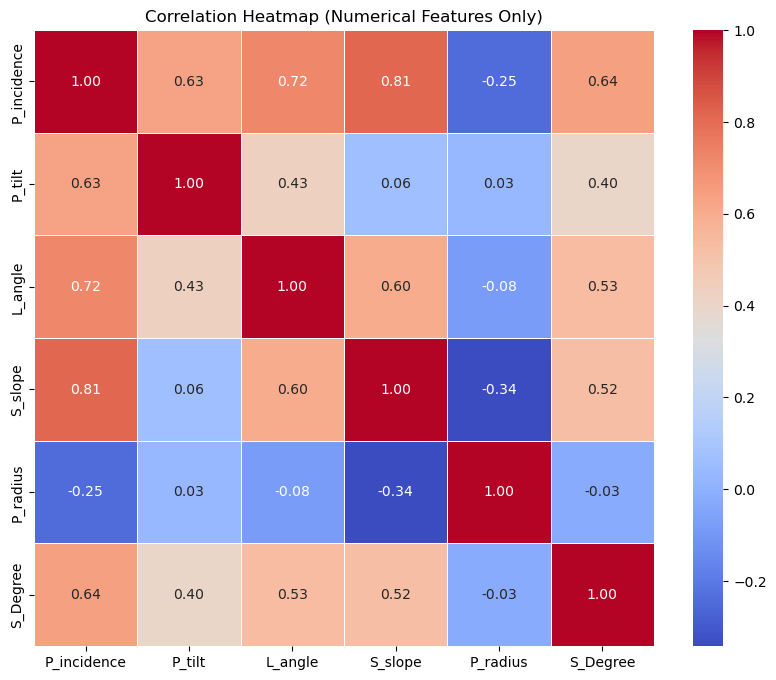

In [20]:
# Calculate the correlation matrix for numerical features

correlation_matrix = numerical_columns.corr()

# Create a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

Certainly, here are insights into the correlation between features, both stronger and weaker, based on the correlation values:

A. Features having stronger correlation with correlation value:

   1. **Strong Positive Correlation:**
      - 'P_incidence' and 'S_slope' have a strong positive correlation with a correlation value of 0.81. This indicates that as 'P_incidence' increases, 'S_slope' tends to increase as well, and vice versa.
      - 'L_angle' and 'S_slope' also exhibit a strong positive correlation with a correlation value of 0.60. An increase in 'L_angle' is associated with an increase in 'S_slope,' and vice versa.
      - 'P_incidence' and 'S_Degree' have a strong positive correlation with a correlation value of 0.64. An increase in 'P_incidence' is associated with an increase in 'S_Degree,' and vice versa.

B. Features having weaker correlation with correlation value:

   1. **Weak Positive Correlation:**
      - 'P_tilt' and 'L_angle' have a weak positive correlation with a correlation value of 0.43. While there is a positive relationship, it is not as strong as the previously mentioned correlations.

   2. **Weak Negative Correlation:**
      - 'P_incidence' and 'P_radius' have a weak negative correlation with a correlation value of -0.25. This suggests that as 'P_incidence' increases, 'P_radius' tends to decrease slightly.
      - 'P_tilt' and 'P_radius' also have a weak positive correlation with a correlation value of 0.03. The relationship is very weak, indicating that changes in one variable have minimal impact on the other.
      - 'P_radius' and 'S_Degree' have a very weak negative correlation with a correlation value of -0.03. The relationship is negligible.

These insights provide an understanding of the strength and direction of relationships between various features in the dataset. Strong correlations suggest that changes in one feature are closely associated with changes in another, while weak correlations imply a looser or less predictable relationship. These observations can be valuable when selecting features for analysis or modeling and can help identify potential multicollinearity issues in regression analysis.

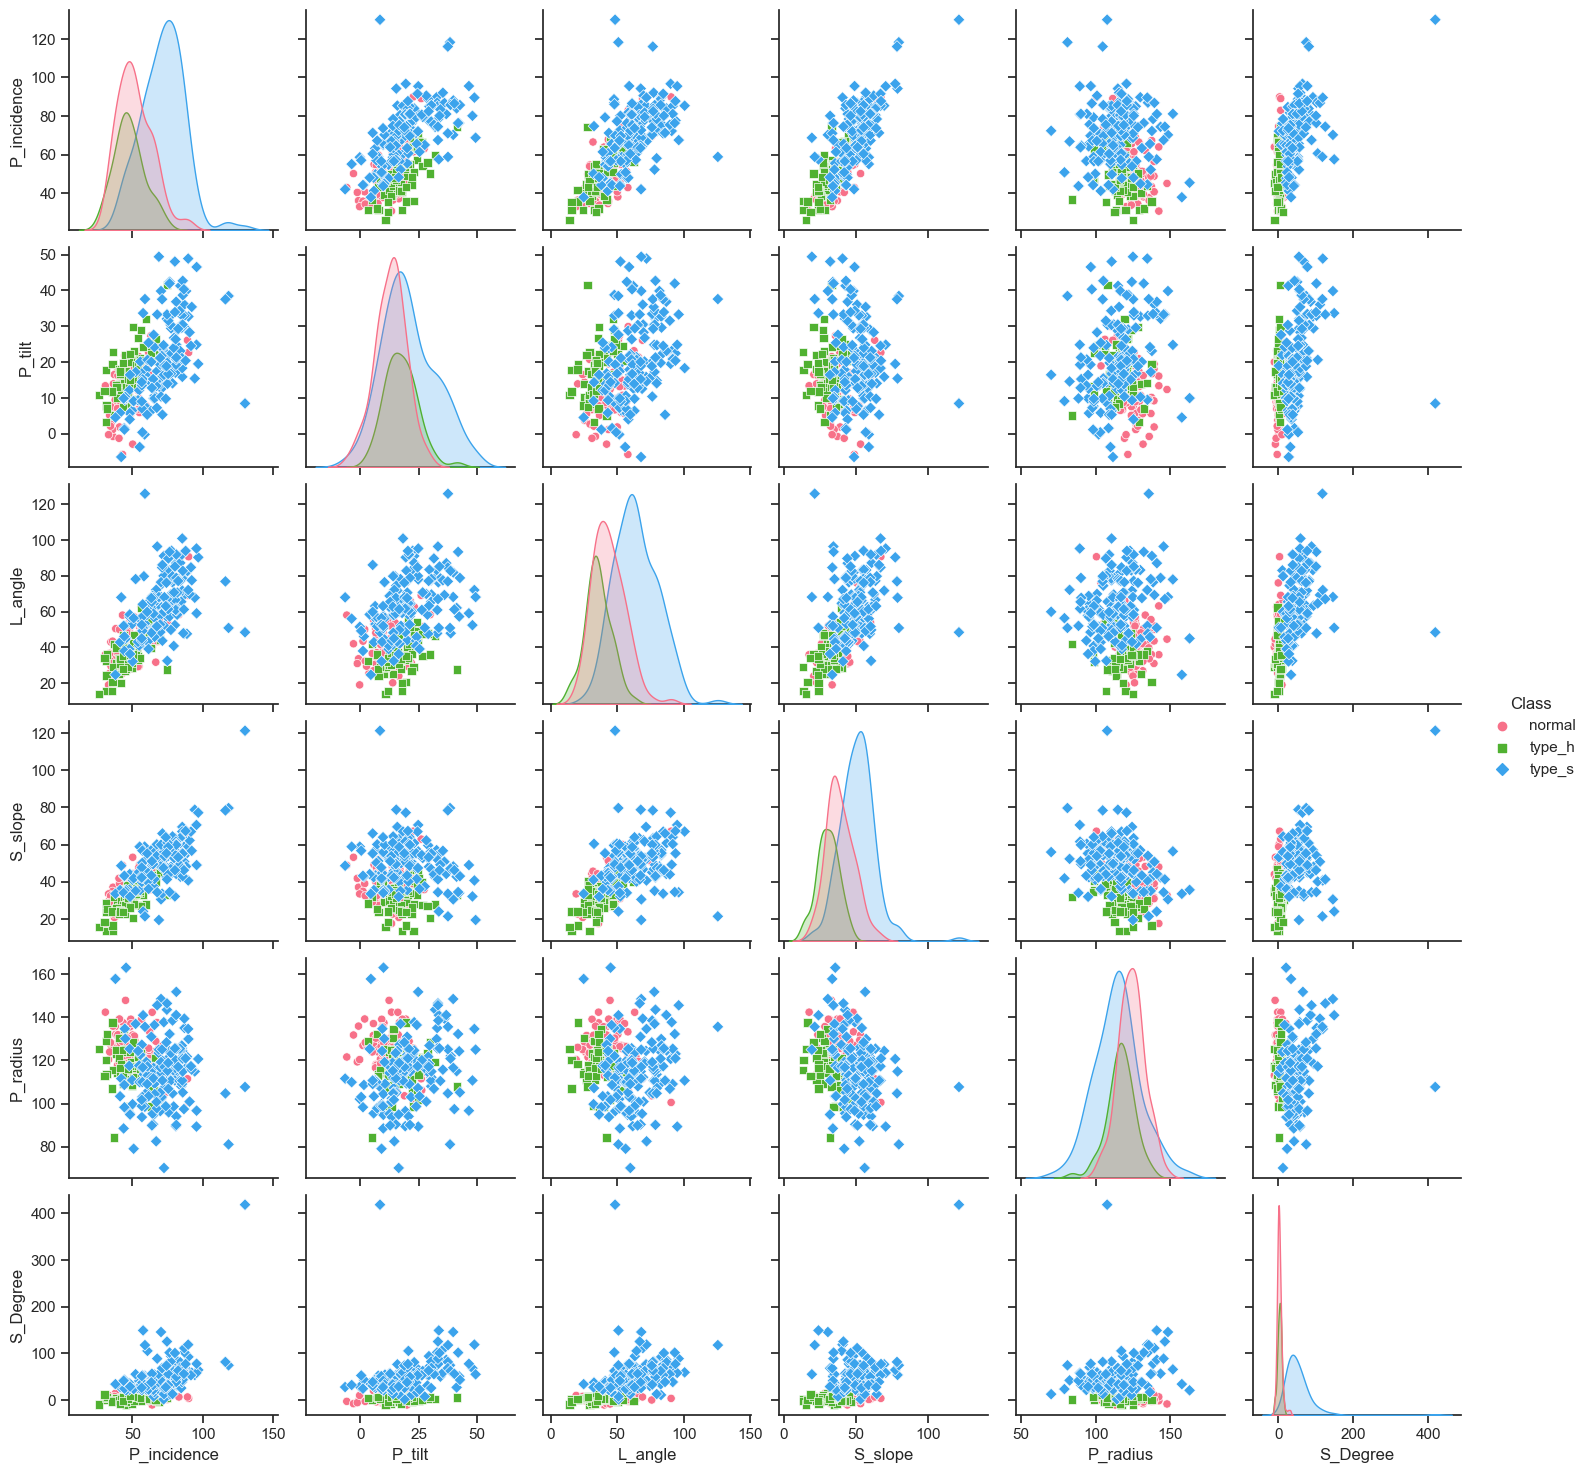

In [21]:
# Set the style for the pairplot

sns.set(style="ticks")

# Create a pairplot with classes distinguished by colors

pairplot = sns.pairplot(combined, hue='Class', palette='husl', markers=["o", "s", "D"])

# Manually create legend handles and labels

legend_labels = combined['Class'].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10),
                  plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='orange', markersize=10)]

# Show the plot

plt.show()

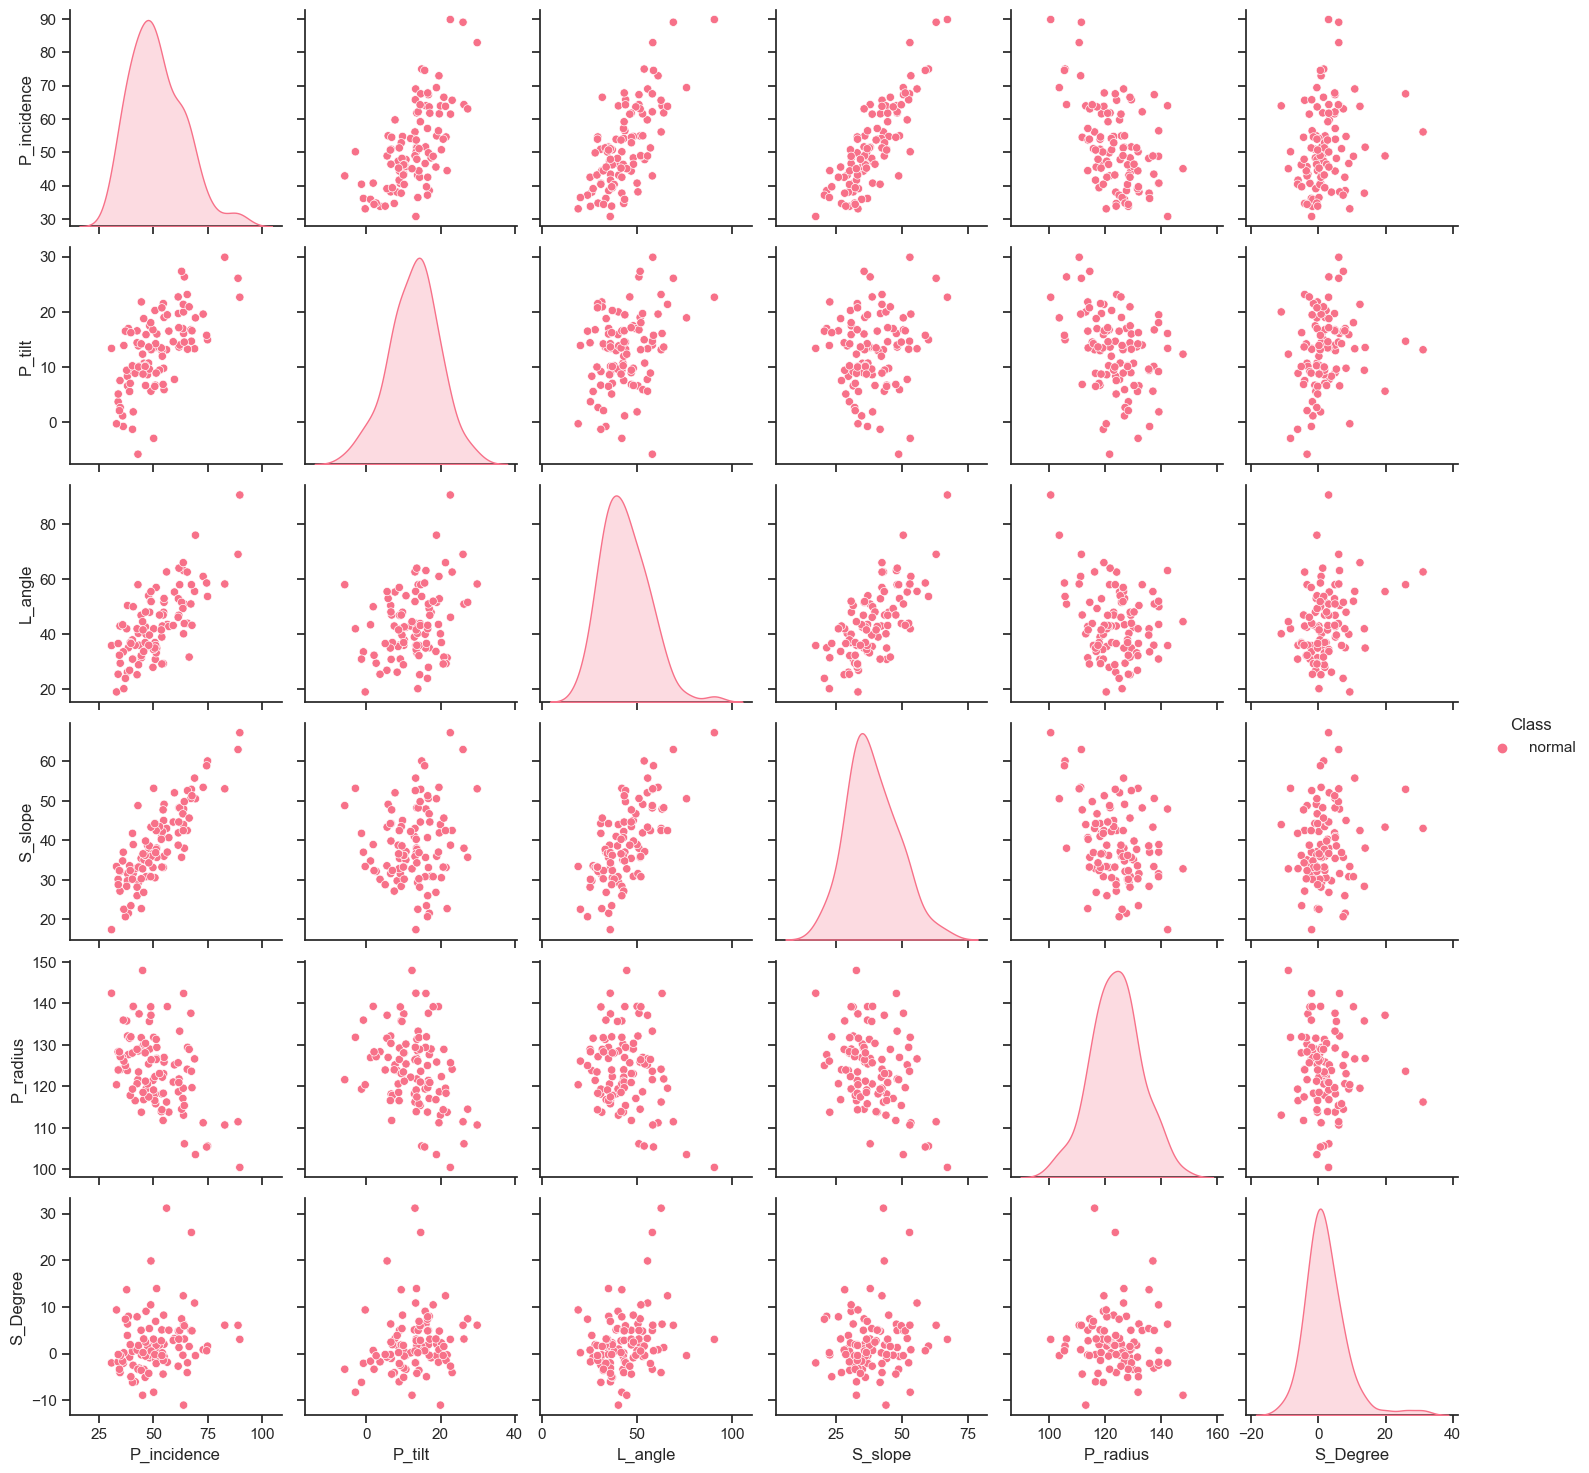

In [22]:
# Set the style for the pairplot

sns.set(style="ticks")

# Create a pairplot with classes distinguished by colors

pairplot = sns.pairplot(normal, hue='Class', palette='husl')

# Show the plot

plt.show()

**P_incidence:**
   - Data for 'P_incidence' does not follow a normal distribution for the class 'normal'.
   - The distribution of 'P_incidence' is right-skewed (positively skewed).
   - There is at least one outlier identified for 'P_incidence' in the class 'normal'.

**P_tilt:**
   - Data for 'P_tilt' follows a normal distribution for the class 'normal'.
   - 'P_tilt' has a mild left-skew (negatively skewed) distribution.
   - There are outliers identified for 'P_tilt' in the class 'normal'.

**L_angle:**
   - Data for 'L_angle' does not follow a normal distribution for the class 'normal'.
   - The distribution of 'L_angle' is right-skewed.
   - There is at least one outlier detected for 'L_angle' in the class 'normal'.

**S_slope:**
   - Data for 'S_slope' follows a normal distribution for the class 'normal'.
   - 'S_slope' has a mild right-skew.
   - There are no outliers identified for 'S_slope' in the class 'normal'.

**P_radius:**
   - Data for 'P_radius' follows a normal distribution for the class 'normal'.
   - 'P_radius' has a relatively symmetric distribution.
   - There are outliers identified for 'P_radius' in the class 'normal'.

**S_Degree:**
   - Data for 'S_Degree' does not follow a normal distribution for the class 'normal'.
   - 'S_Degree' has a substantial right-skew in the distribution.
   - There are several outliers detected for 'S_Degree' in the class 'normal'.

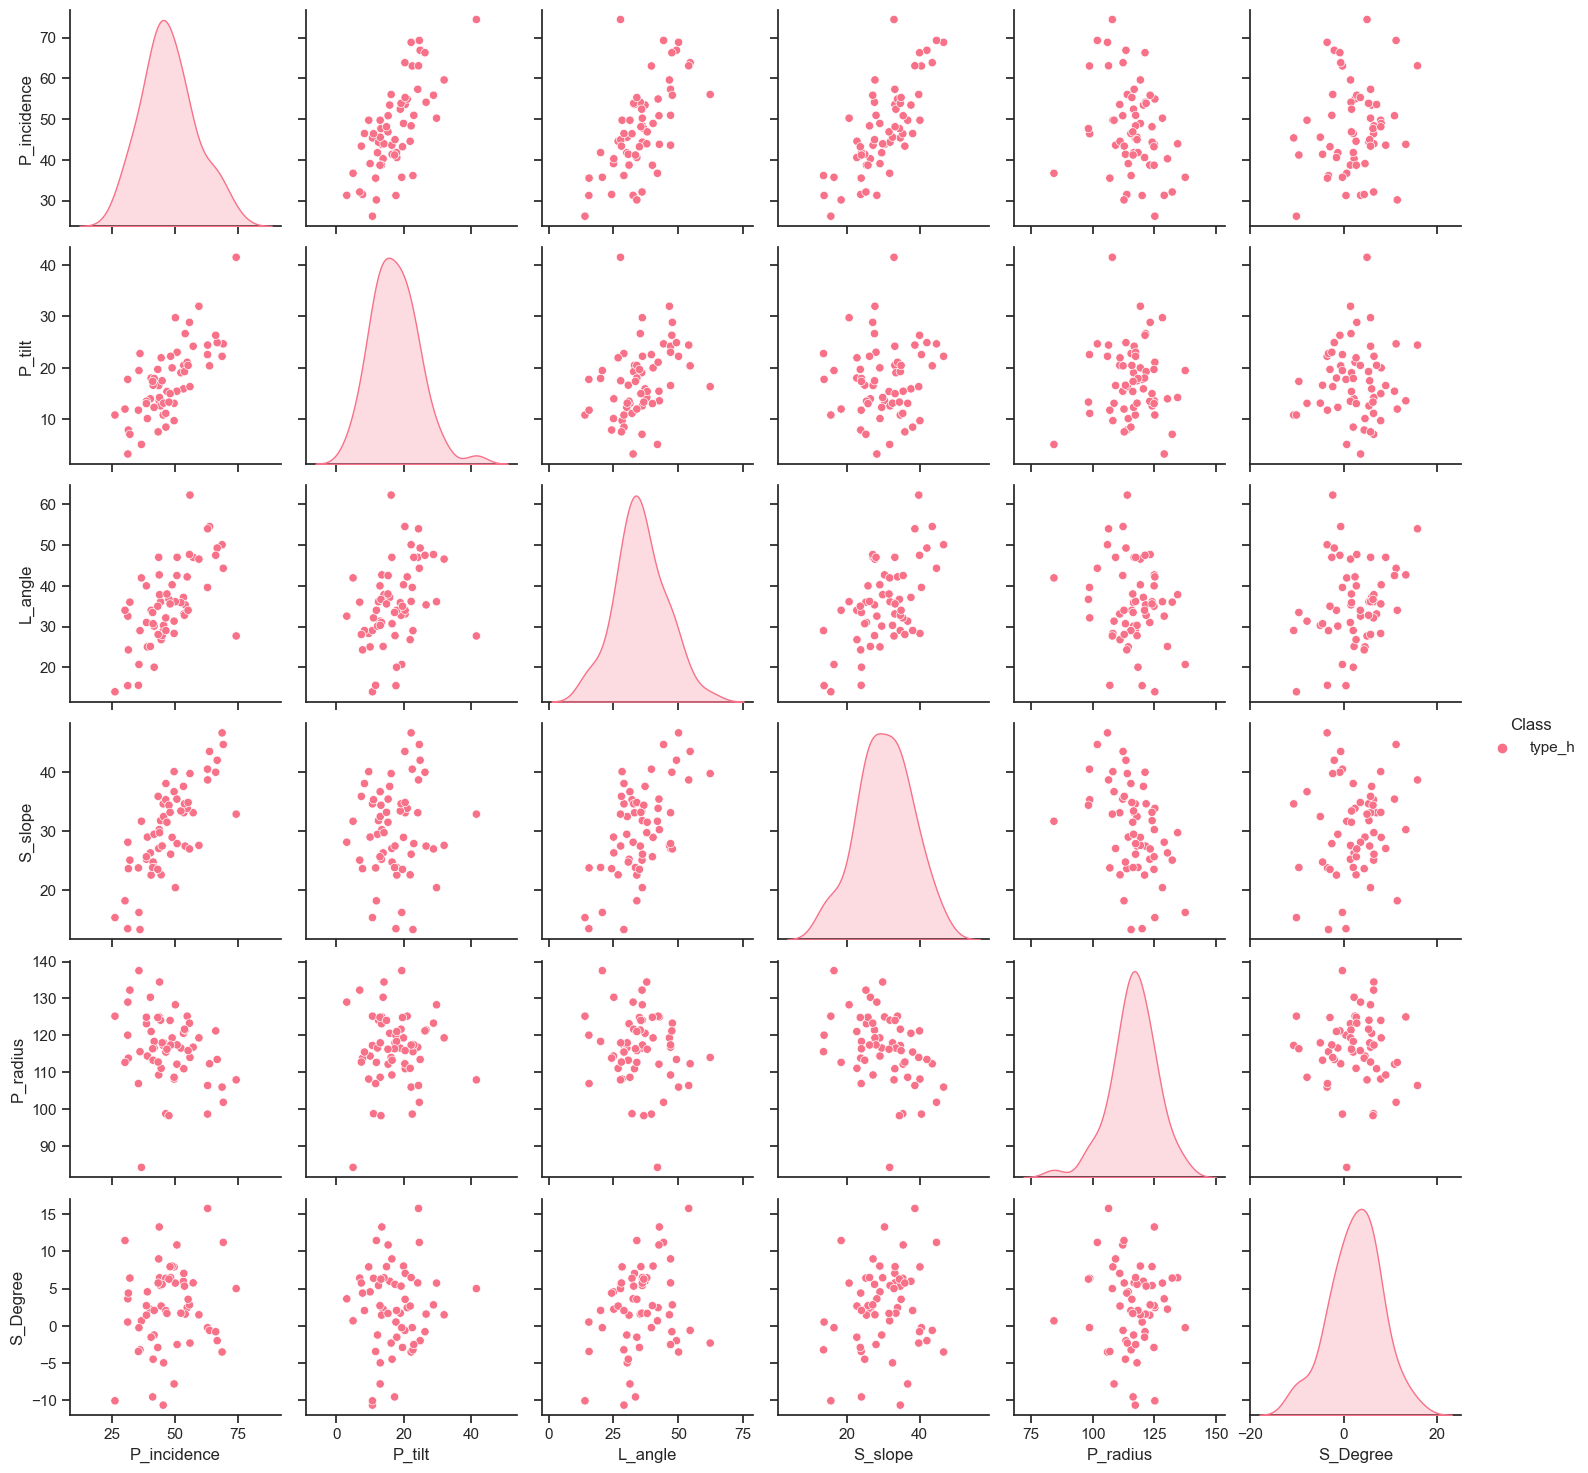

In [23]:
# Set the style for the pairplot

sns.set(style="ticks")

# Create a pairplot with classes distinguished by colors

pairplot = sns.pairplot(type_h, hue='Class', palette='husl')

# Show the plot

plt.show()

**P_incidence:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'P_incidence' is slightly right-skewed (positively skewed).
- At least one outlier identified for 'P_incidence' in class 'type_h'.

**P_tilt:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'P_tilt' is right-skewed (positively skewed).
- Outliers identified for 'P_tilt' in class 'type_h'.

**L_angle:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'L_angle' is slightly right-skewed (positively skewed).
- At least one outlier detected for 'L_angle' in class 'type_h'.

**S_slope:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'S_slope' is slightly left-skewed (negatively skewed).
- No outliers identified for 'S_slope' in class 'type_h'.

**P_radius:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'P_radius' is left-skewed (negatively skewed).
- Outliers identified for 'P_radius' in class 'type_h'.

**S_Degree:**
- Data follows a normal distribution for class 'type_h'.
- Distribution of 'S_Degree' is slightly left-skewed (negatively skewed).
- No outliers identified for 'S_Degree' in class 'type_h'.

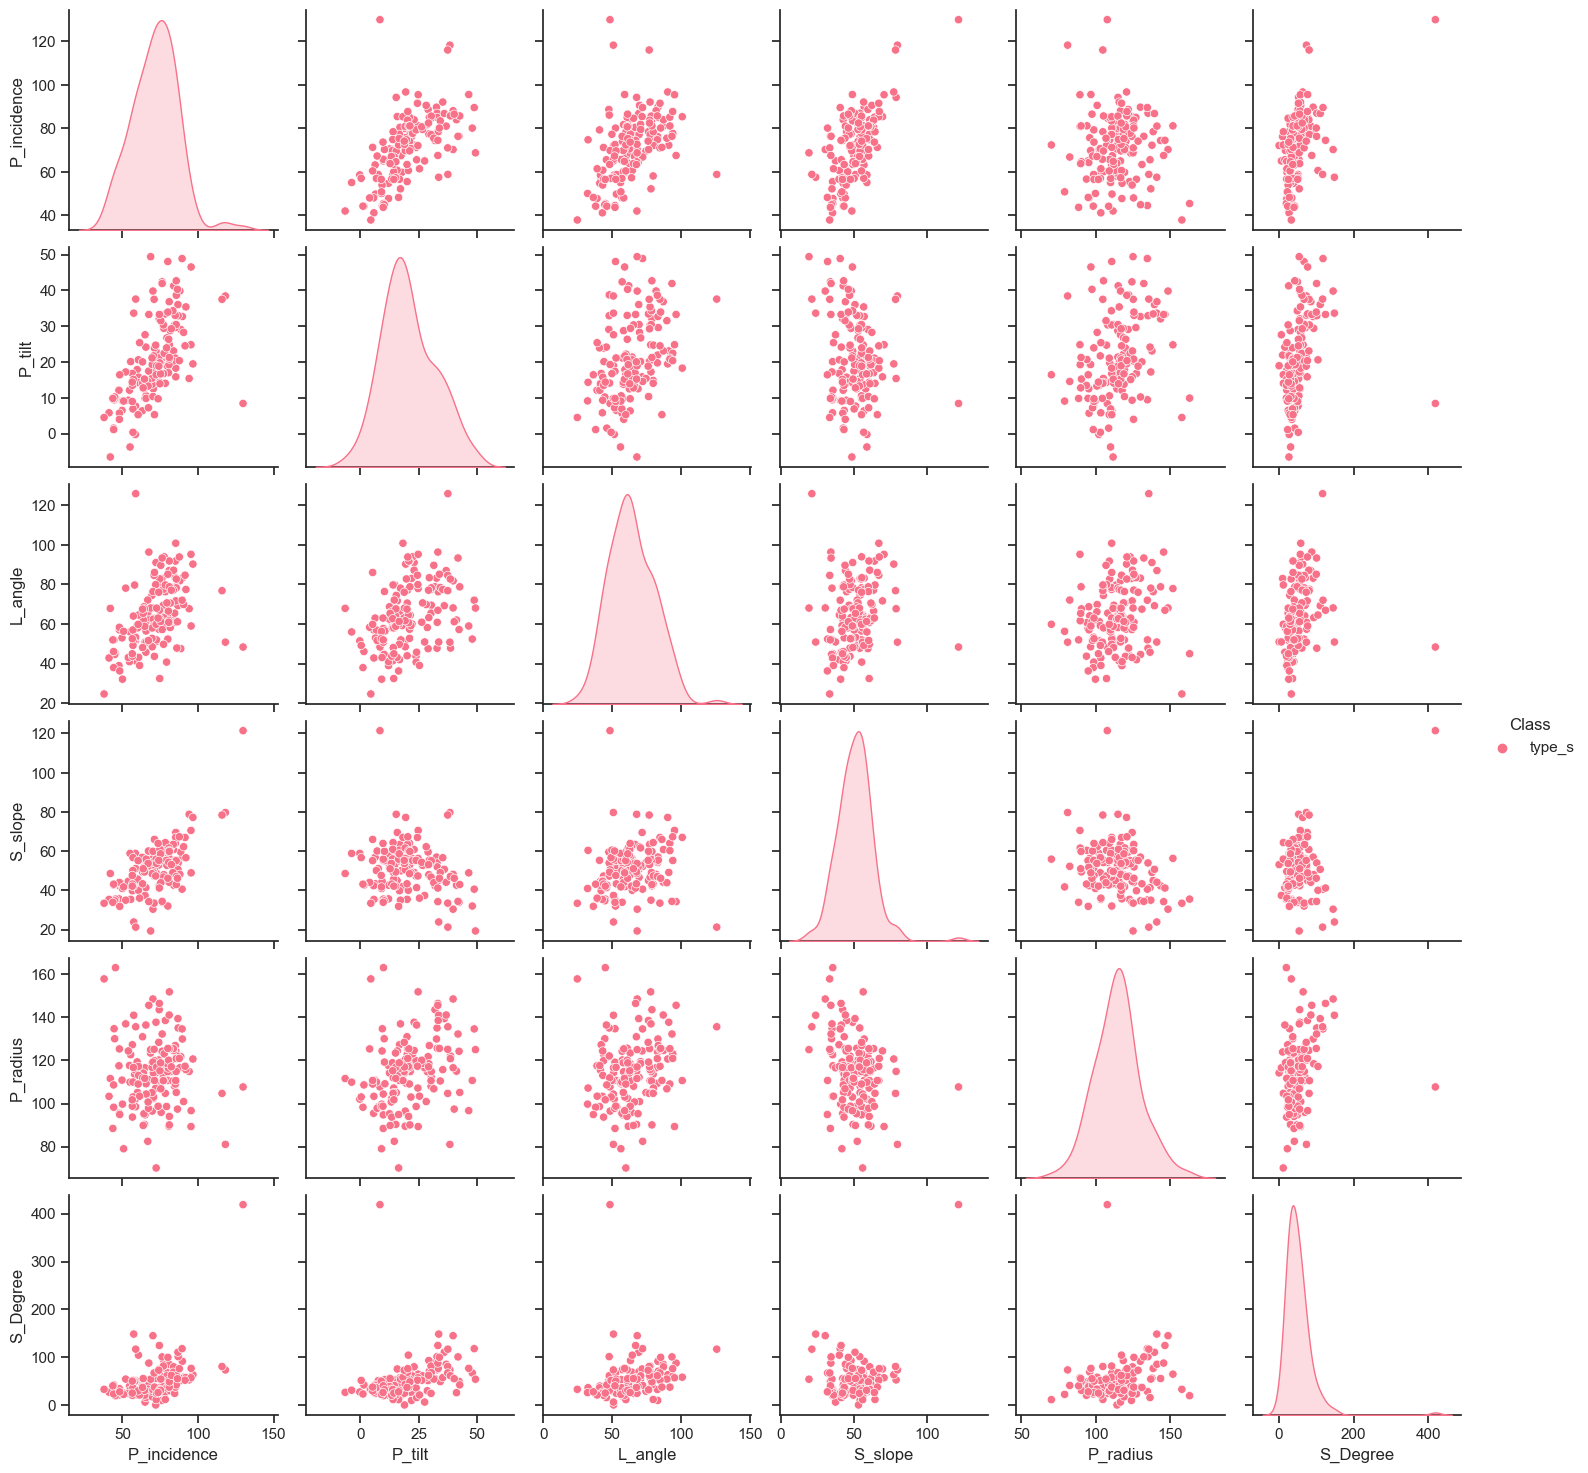

In [24]:
# Set the style for the pairplot

sns.set(style="ticks")

# Create a pairplot with classes distinguished by colors

pairplot = sns.pairplot(type_s, hue='Class', palette='husl')

# Show the plot

plt.show()

**P_incidence:**
- Data does not follow a normal distribution for class 'type_s'.
- Distribution of 'P_incidence' is slightly right-skewed (positively skewed).
- At least one outlier identified for 'P_incidence' in class 'type_s'.

**P_tilt:**
- Data does not follow a normal distribution for class 'type_s'.
- Distribution of 'P_tilt' is right-skewed (positively skewed).
- Outliers identified for 'P_tilt' in class 'type_s'.

**L_angle:**
- Data follows a normal distribution for class 'type_s'.
- Distribution of 'L_angle' is slightly right-skewed (positively skewed).
- At least one outlier detected for 'L_angle' in class 'type_s'.

**S_slope:**
- Data does not follow a normal distribution for class 'type_s'.
- Distribution of 'S_slope' is moderately left-skewed (negatively skewed).
- Outliers identified for 'S_slope' in class 'type_s'.

**P_radius:**
- Data follows a normal distribution for class 'type_s'.
- Distribution of 'P_radius' is slightly right-skewed (positively skewed).
- Outliers identified for 'P_radius' in class 'type_s'.

**S_Degree:**
- Data does not follow a normal distribution for class 'type_s'.
- Distribution of 'S_Degree' is heavily right-skewed (positively skewed).
- Outliers identified for 'S_Degree' in class 'type_s'.

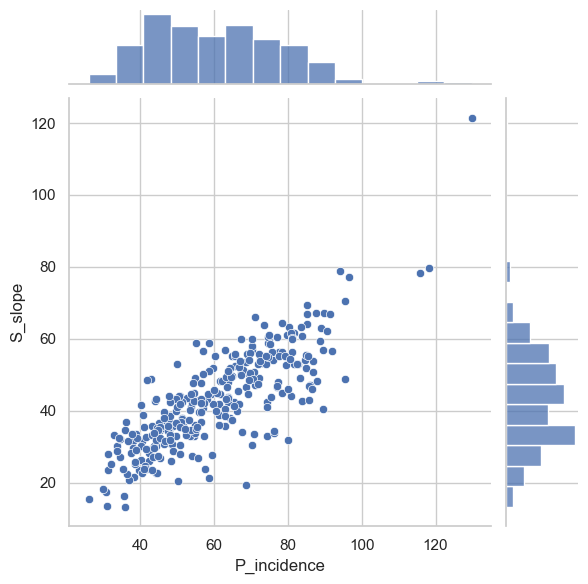

In [25]:
sns.set(style="whitegrid")
sns.jointplot(data=combined, x='P_incidence', y='S_slope', kind='scatter')

plt.show()

1. Positive covariance and strong positive correlation indicate a direct relationship. As 'P_incidence' increases, 'S_slope' tends to increase.

2. 'P_incidence' slightly positively skewed.
   'S_slope' moderately positively skewed.

3. Outliers detected in both 'P_incidence' and 'S_slope' suggest data points significantly different from the majority.

4. Scatter plot shows points clustered positively, indicating the strong positive correlation.
   Marginal histograms depict skewed distributions.

5. Positive correlation suggests medical implications, e.g., as pelvic incidence angle increases, sacral slope angle tends to increase, relevant for spinal condition diagnosis.

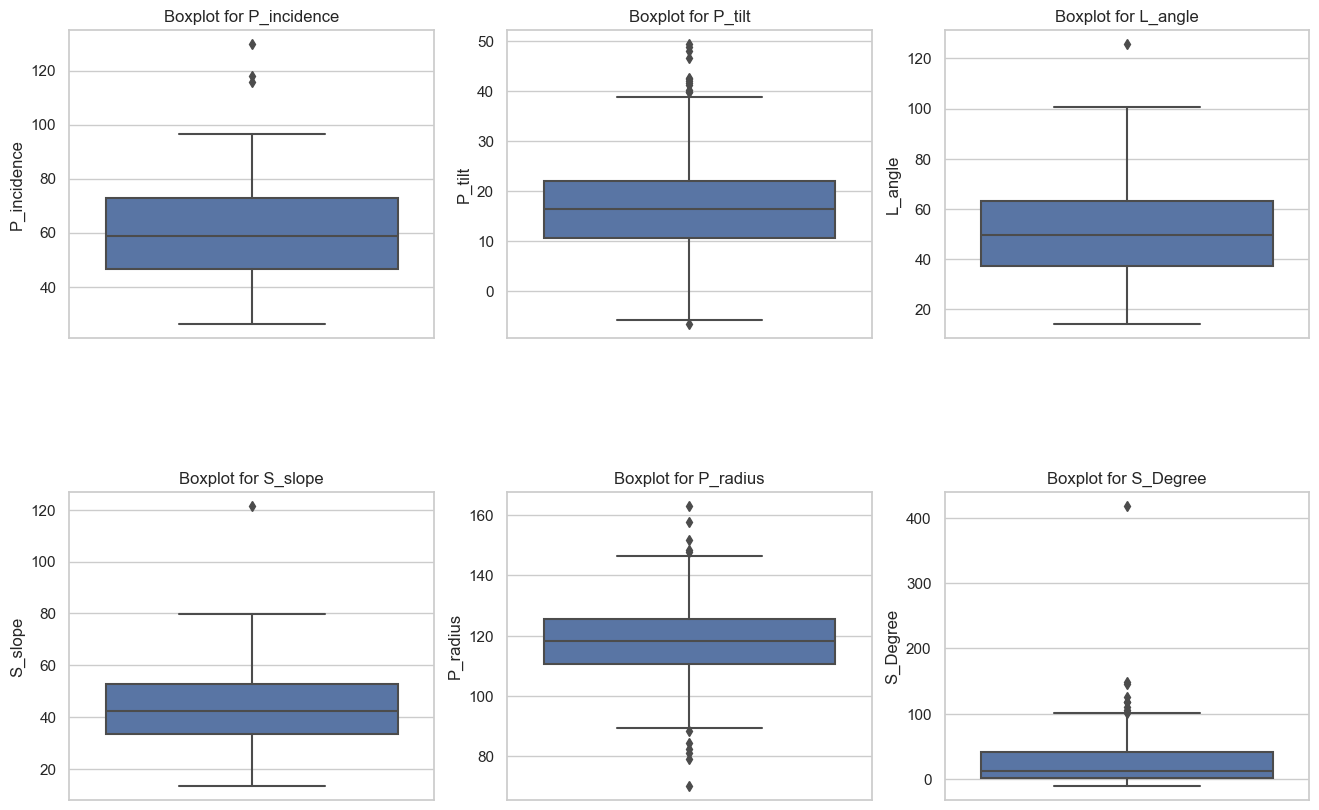

In [26]:
# Set the plot style

sns.set(style="whitegrid")

# Create subplots for each feature

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
fig.subplots_adjust(hspace=0.5)

# Boxplots for each feature without grouping by 'class'

sns.boxplot(ax=axes[0, 0], data=combined, y='P_incidence')
axes[0, 0].set_title('Boxplot for P_incidence')
sns.boxplot(ax=axes[0, 1], data=combined, y='P_tilt')
axes[0, 1].set_title('Boxplot for P_tilt')
sns.boxplot(ax=axes[0, 2], data=combined, y='L_angle')
axes[0, 2].set_title('Boxplot for L_angle')
sns.boxplot(ax=axes[1, 0], data=combined, y='S_slope')
axes[1, 0].set_title('Boxplot for S_slope')
sns.boxplot(ax=axes[1, 1], data=combined, y='P_radius')
axes[1, 1].set_title('Boxplot for P_radius')
sns.boxplot(ax=axes[1, 2], data=combined, y='S_Degree')
axes[1, 2].set_title('Boxplot for S_Degree')

# Show the plot

plt.show()

- Strong positive correlation between 'P_incidence' and 'S_slope'.
- Positive correlations of 'P_incidence' with 'L_angle' and 'S_Degree'.
- Weak negative correlation between 'P_incidence' and 'P_radius'.
- Strong positive covariance of 'S_Degree' with 'P_incidence'.
- Strong covariances of 'S_Degree' with 'S_slope' and 'L_angle'.
- 'S_Degree' has the highest skewness, indicating a highly skewed distribution.
- Positive skewness for 'S_slope' and 'P_radius'.
- Positive skewness for 'P_incidence', 'P_tilt', 'L_angle', and 'S_Degree'.
- Outliers detected in various feature combinations, associated with different classes ('type_s', 'type_h', 'normal').
- Notable outliers with high values in 'P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', and 'S_Degree'.

**Step 4. Model Building**

In [27]:
data = combined.copy()

In [28]:
# Split the data into features (X) and target variable (Y)

X = data.drop(columns=['Class'])  # Features
Y = data['Class']  # Target variable

In [29]:
# Split the data into training and testing sets (80:20 proportion)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# Create a KNN classifier with a specified number of neighbors (e.g., n_neighbors=3)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [31]:
# Fit the model to the training data

knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Predictions on training data

Y_train_pred = knn_classifier.predict(X_train)

In [33]:
# Predictions on test data

Y_test_pred = knn_classifier.predict(X_test)

In [34]:
# Performance metrics for training data

print("Performance Metrics for Training Data:")
print("Accuracy:", accuracy_score(Y_train, Y_train_pred))
print("Classification Report:\n", classification_report(Y_train, Y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_train, Y_train_pred))

Performance Metrics for Training Data:
Accuracy: 0.9233870967741935
Classification Report:
               precision    recall  f1-score   support

      normal       0.87      0.88      0.88        78
      type_h       0.86      0.84      0.85        50
      type_s       0.98      0.98      0.98       120

    accuracy                           0.92       248
   macro avg       0.90      0.90      0.90       248
weighted avg       0.92      0.92      0.92       248

Confusion Matrix:
 [[ 69   7   2]
 [  8  42   0]
 [  2   0 118]]


In [35]:
# Performance metrics for test data

print("\nPerformance Metrics for Test Data:")
print("Accuracy:", accuracy_score(Y_test, Y_test_pred))
print("Classification Report:\n", classification_report(Y_test, Y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_test_pred))


Performance Metrics for Test Data:
Accuracy: 0.8548387096774194
Classification Report:
               precision    recall  f1-score   support

      normal       0.78      0.82      0.80        22
      type_h       0.70      0.70      0.70        10
      type_s       0.97      0.93      0.95        30

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62

Confusion Matrix:
 [[18  3  1]
 [ 3  7  0]
 [ 2  0 28]]


**Step 5. Performance Improvement**

In [36]:
# Define hyperparameters to tune

param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'weights': ['uniform', 'distance'] 
}

In [37]:
# Create the KNN classifier

knn_classifier = KNeighborsClassifier()

In [38]:
# Perform GridSearchCV with 5-fold cross-validation

grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

In [39]:
# Fit the grid search to the training data

grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [40]:
# Get the best hyperparameters from the grid search

best_params = grid_search.best_params_

In [41]:
# Train a KNN classifier with the best hyperparameters

best_knn_classifier = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    metric=best_params['metric'],
    weights=best_params['weights']
)

best_knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [42]:
# Evaluate the performance of the best model

Y_test_pred_best = best_knn_classifier.predict(X_test)

In [43]:
# Calculate accuracy improvement

accuracy_base = accuracy_score(Y_test, Y_test_pred)
accuracy_best = accuracy_score(Y_test, Y_test_pred_best)
accuracy_improvement = (accuracy_best - accuracy_base) * 100

In [44]:
# Print the best hyperparameters and performance improvement

print("Best Hyperparameters:", best_params)
print("Base Model Accuracy:", accuracy_base)
print("Best Model Accuracy:", accuracy_best)
print(f"Accuracy Improvement: {accuracy_improvement:.2f}%")

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Base Model Accuracy: 0.8548387096774194
Best Model Accuracy: 0.8387096774193549
Accuracy Improvement: -1.61%


It appears that the best hyperparameters selected by the grid search are as follows:

- Metric: 'euclidean'
- Number of Neighbors (n_neighbors): 9
- Weights: 'distance'

However, it's interesting to note that the performance of the best model (with these hyperparameters) is slightly lower than the base model. The accuracy improvement is negative, indicating a slight decrease in accuracy compared to the base model.

This result suggests that the default hyperparameters used in the base KNN model may be quite effective for this dataset, and tuning the hyperparameters did not lead to a significant improvement in accuracy. Sometimes, the default settings or simple models can perform well, and hyperparameter tuning may not always lead to better results.

In this case, the key hyperparameters that contributed most to the model performance were not significantly different from the default values.

---

### Part B

---

**Step 1. Data Understanding and Preparation**

In [45]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Read the CSV files into DataFrames

data1 = pd.read_csv('/Users/meghnarana/Documents/Supervised Learning Project/Data1.csv')
data2 = pd.read_csv('/Users/meghnarana/Documents/Supervised Learning Project/Data2.csv')

In [47]:
# Printing shape of data1

print("Shape of Data1:", data1.shape)

Shape of Data1: (5000, 8)


In [48]:
# Printing column names and data types of data1

print("Column Names and DataTypes of Data1:")
print(data1.dtypes)

Column Names and DataTypes of Data1:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [49]:
# Printing shape of data2

print("Shape of Data2:", data2.shape)

Shape of Data2: (5000, 7)


In [50]:
# Printing column names and data types of data2

print("Column Names and DataTypes of Data2:")
print(data2.dtypes)

Column Names and DataTypes of Data2:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [51]:
# Merge data1 and data2 on the 'ID' feature

merged_data = data1.merge(data2, on='ID', how='inner')

In [52]:
# Display the merged DataFrame

merged_data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [53]:
columns_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

In [54]:
# Change the data type of selected columns to 'object'

merged_data[columns_to_convert] = merged_data[columns_to_convert].astype('object')

In [55]:
# Verify the updated data types

print(merged_data.dtypes)

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


**Step 2. Data Exploration and Analysis**

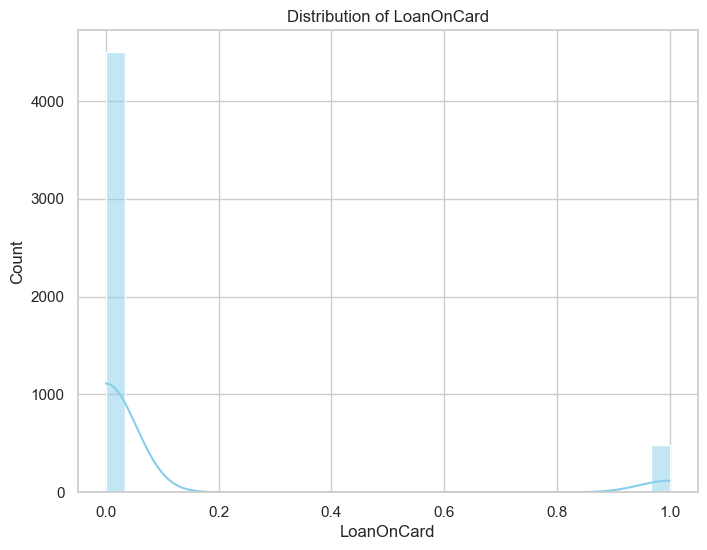

In [56]:
# Set the style for the plots

sns.set(style="whitegrid")

# Create a histogram to visualize the distribution of 'LoanOnCard'

plt.figure(figsize=(8, 6))
sns.histplot(merged_data['LoanOnCard'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

1. The histogram shows the distribution of 'LoanOnCard.' It appears to be slightly positively skewed, with more instances having lower values and a tail towards higher values.

2. The 'LoanOnCard' distribution has an asymmetric shape, with most customers having low or no loan amounts, while a minority of customers have relatively higher loan amounts.

3. The peak of the distribution seems to be around zero or a low value. This suggests that a significant portion of customers may not have a loan on their credit card.

4. The distribution has some extreme values, indicating the presence of outliers in the dataset.

5. The overlaid KDE curve provides a smooth estimate of the probability density function of the variable. It confirms that the majority of customers have lower loan amounts.

6. Based on this distribution, the bank may consider targeting customers with zero or low 'LoanOnCard' values for marketing campaigns aimed at promoting credit card loans. Additionally, identifying and targeting customers with higher 'LoanOnCard' values could also be a strategy to increase loan business.

In [57]:
# Check for missing values in the dataset

missing_percentage = merged_data.isnull().mean() * 100

In [58]:
# Display columns with missing values and their respective percentages

columns_with_missing = missing_percentage[missing_percentage > 0]
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
LoanOnCard    0.4
dtype: float64


In [59]:
# Impute missing values

median_loan = merged_data['LoanOnCard'].median()
merged_data['LoanOnCard'].fillna(median_loan, inplace=True)

In [60]:
# Verify that missing values have been imputed (if any)

missing_percentage_after_imputation = merged_data.isnull().mean() * 100
print("\nColumns with missing values after imputation:")
print(missing_percentage_after_imputation)


Columns with missing values after imputation:
ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.0
dtype: float64


In [61]:
merged_data['Security'].unique()

array([1, 0], dtype=object)

In [62]:
merged_data['FixedDepositAccount'].unique()

array([0, 1], dtype=object)

In [63]:
merged_data['InternetBanking'].unique()

array([0, 1], dtype=object)

In [64]:
merged_data['CreditCard'].unique()

array([0, 1], dtype=object)

In [65]:
merged_data['LoanOnCard'].unique()

array([0., 1.])

Since there are no unexpected values like '?', 'a', or 1.5 in these columns, there is no need for further treatment or imputation for these categorical variables.

**Step 3. Data Preparation and model building**

In [66]:
# Drop 'ID' and 'ZipCode' columns and assign the result to X

X = merged_data.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)

In [67]:
# Assign the 'LoanOnCard' column to Y as the target variable

Y = merged_data['LoanOnCard']

In [68]:
# Split the data into training (75%) and testing (25%) sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [69]:
# Print the shapes of the resulting sets to verify the split

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3750, 11)
X_test shape: (1250, 11)
Y_train shape: (3750,)
Y_test shape: (1250,)


In [70]:
# Create a Logistic Regression model

logistic_model = LogisticRegression(random_state=42)

In [71]:
# Train the model on the training data

logistic_model.fit(X_train, Y_train)

/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [72]:
# Make predictions on the test data

Y_pred = logistic_model.predict(X_test)

In [73]:
# Evaluate the model's performance

accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
classification_report_str = classification_report(Y_test, Y_pred)

In [74]:
# Print the evaluation metrics and insights

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.9496
Confusion Matrix:
[[1107    9]
 [  54   80]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1116
         1.0       0.90      0.60      0.72       134

    accuracy                           0.95      1250
   macro avg       0.93      0.79      0.84      1250
weighted avg       0.95      0.95      0.95      1250



- The accuracy of the model is approximately 94.96%. This indicates that the model correctly predicts whether customers have a loan on their credit card or not for nearly 95% of the test cases.
- The confusion matrix provides a detailed breakdown of the model's predictions, showing that it has a high number of true positives and true negatives, indicating good performance.
- Precision for class 0 (no loan) is 0.95, indicating that the model correctly identifies customers without a loan in 95% of cases.
- Precision for class 1 (loan) is 0.90, indicating that the model correctly identifies customers with a loan in 90% of cases.
- Recall for class 0 is 0.99, showing that the model identifies nearly all customers without a loan.
- Recall for class 1 is 0.60, indicating that the model identifies 60% of customers with a loan.
- The F1-score for class 0 is 0.97, and for class 1, it is 0.72.
- The macro avg and weighted avg metrics provide overall measures of precision, recall, and F1-score, considering both classes.

IN SUMMARY:
- The model exhibits high accuracy, indicating that it is good at overall classification.
- The precision and recall values for class 0 (no loan) are high, indicating that the model is effective at identifying customers without a loan.
- However, the recall for class 1 (loan) is relatively lower (0.60), suggesting that the model could improve its ability to identify customers with a loan.
- The F1-score provides a balanced measure of precision and recall, with class 0 having a high F1-score (0.97), while class 1 has a moderate F1-score (0.72).

In [75]:
# Check the distribution of the target variable before balancing

print("Distribution of the target variable (Before balancing):")
print(Counter(Y))

Distribution of the target variable (Before balancing):
Counter({0.0: 4520, 1.0: 480})


In [76]:
# Use SMOTE to oversample the minority class (class A)

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [77]:
# Check the distribution of the target variable after balancing

print("\nDistribution of the target variable (After balancing):")
print(Counter(Y_resampled))


Distribution of the target variable (After balancing):
Counter({0.0: 4520, 1.0: 4520})


In [78]:
# Create a Logistic Regression model

logistic_model_balanced = LogisticRegression(random_state=42)

In [79]:
# Train the model on the balanced data

logistic_model_balanced.fit(X_resampled, Y_resampled)

/Users/meghnarana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [80]:
# Make predictions on the test data

Y_pred_balanced = logistic_model_balanced.predict(X_test)

In [81]:
# Evaluate the model's performance on the balanced data

accuracy_balanced = accuracy_score(Y_test, Y_pred_balanced)
confusion_balanced = confusion_matrix(Y_test, Y_pred_balanced)
classification_report_str_balanced = classification_report(Y_test, Y_pred_balanced)

In [82]:
# Print the evaluation metrics and differences

print("Accuracy (Balanced Data):", accuracy_balanced)
print("Confusion Matrix (Balanced Data):")
print(confusion_balanced)
print("Classification Report (Balanced Data):")
print(classification_report_str_balanced)

Accuracy (Balanced Data): 0.8968
Confusion Matrix (Balanced Data):
[[1000  116]
 [  13  121]]
Classification Report (Balanced Data):
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1116
         1.0       0.51      0.90      0.65       134

    accuracy                           0.90      1250
   macro avg       0.75      0.90      0.80      1250
weighted avg       0.94      0.90      0.91      1250



In [83]:
# Compare the differences in performance metrics

accuracy_difference = accuracy_balanced - accuracy
print("\nAccuracy Difference:", accuracy_difference)


Accuracy Difference: -0.05279999999999996


- The accuracy on the balanced data is approximately 89.68%. This indicates that the model correctly predicts whether customers have a loan on their credit card or not for nearly 89.68% of the test cases on the balanced data.
- Precision for class 0 (no loan) is high at 0.99, indicating that the model correctly identifies customers without a loan in the majority of cases.
- Precision for class 1 (loan) is lower at 0.51, suggesting that the model identifies customers with a loan but with a higher rate of false positives.
- Recall for class 0 is 0.90, indicating that the model identifies the majority of customers without a loan.
- Recall for class 1 is also 0.90, showing that the model identifies a significant portion of customers with a loan.
- The F1-score for class 0 is high (0.94), while for class 1, it is moderate (0.65).
- The macro avg and weighted avg metrics provide overall measures of precision, recall, and F1-score, considering both classes.
- The accuracy difference (`accuracy_balanced - accuracy`) is negative (-0.0528), indicating a slight decrease in accuracy when comparing the model's performance on the balanced data to the original imbalanced data.

Differences Observed:
- Balancing the data has improved recall for class 1 (loan), making the model better at identifying customers with a loan. This improvement is evident in the recall score (0.90) for class 1 on the balanced data, compared to the original recall (0.60) on the imbalanced data.
- However, the precision for class 1 has decreased (0.90 to 0.51), indicating an increase in false positives for customers with a loan.
- The overall accuracy has decreased slightly, which is expected when balancing the data because the model becomes more cautious and may classify more instances as positive.
- The F1-score for class 1 remains moderate (0.65) on the balanced data.

**Step 4. Performance Improvement**

In [84]:
# Create and train a base SVM model

svm_model = SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [85]:
# Make predictions on the test set

Y_pred_svm = svm_model.predict(X_test)

In [86]:
# Evaluate the base SVM model

svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print("Base SVM Model Accuracy:", svm_accuracy)

Base SVM Model Accuracy: 0.8976


In [87]:
# Print classification report

print("Classification Report for Base SVM Model:")
print(classification_report(Y_test, Y_pred_svm))

Classification Report for Base SVM Model:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1116
         1.0       0.69      0.08      0.15       134

    accuracy                           0.90      1250
   macro avg       0.79      0.54      0.55      1250
weighted avg       0.88      0.90      0.86      1250



In [88]:
# Print confusion matrix

print("Confusion Matrix for Base SVM Model:")
print(confusion_matrix(Y_test, Y_pred_svm))

Confusion Matrix for Base SVM Model:
[[1111    5]
 [ 123   11]]


In [89]:
# Define the parameter grid for SVM

param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel types to try
}

In [90]:
# Create a GridSearchCV object for SVM

svm_grid_search = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [91]:
# Fit the GridSearchCV object to the data

svm_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy', verbose=1)

In [92]:
# Get the best SVM model

best_svm_model = svm_grid_search.best_estimator_

In [93]:
# Print the best hyperparameters

print("Best Hyperparameters for SVM:")
print(svm_grid_search.best_params_)

Best Hyperparameters for SVM:
{'C': 10, 'kernel': 'linear'}


In [94]:
# Evaluate the best SVM model

Y_pred_best_svm = best_svm_model.predict(X_test)
best_svm_accuracy = accuracy_score(Y_test, Y_pred_best_svm)
print("Accuracy for Best SVM Model:", best_svm_accuracy)

Accuracy for Best SVM Model: 0.9528


In [95]:
# Print evaluation metrics for the final SVM model (after hyperparameter tuning)

print("Final SVM Model Evaluation Metrics:")
final_svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy:", final_svm_accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_svm))

Final SVM Model Evaluation Metrics:
Accuracy: 0.8976
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95      1116
         1.0       0.69      0.08      0.15       134

    accuracy                           0.90      1250
   macro avg       0.79      0.54      0.55      1250
weighted avg       0.88      0.90      0.86      1250

Confusion Matrix:
[[1111    5]
 [ 123   11]]


The improvement in accuracy from the base SVM model to the final SVM model is:

Improvement = 0.9528 - 0.8976 = 0.0552

So, the improvement in accuracy is approximately 0.0552 or 5.52%. The final SVM model achieved a higher accuracy compared to the base SVM model, indicating that hyperparameter tuning helped improve the model's performance.

In [96]:
# Create and train a base KNN model

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [97]:
# Make predictions on the test set

Y_pred_knn = knn_model.predict(X_test)

In [98]:
# Evaluate the base KNN model

knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
print("Base KNN Model Accuracy:", knn_accuracy)

Base KNN Model Accuracy: 0.904


In [99]:
# Print classification report

print("Classification Report for Base KNN Model:")
print(classification_report(Y_test, Y_pred_knn))

Classification Report for Base KNN Model:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1116
         1.0       0.60      0.31      0.41       134

    accuracy                           0.90      1250
   macro avg       0.76      0.64      0.68      1250
weighted avg       0.89      0.90      0.89      1250



In [100]:
# Print confusion matrix

print("Confusion Matrix for Base KNN Model:")
print(confusion_matrix(Y_test, Y_pred_knn))

Confusion Matrix for Base KNN Model:
[[1088   28]
 [  92   42]]


In [101]:
# Define the parameter grid for KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7],  
    'metric': ['euclidean', 'manhattan'],  
}

In [102]:
# Create a GridSearchCV object for KNN

knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [103]:
# Fit the GridSearchCV object to the data

knn_grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy', verbose=1)

In [104]:
# Get the best KNN model

best_knn_model = knn_grid_search.best_estimator_

In [105]:
# Print the best hyperparameters

print("Best Hyperparameters for KNN:")
print(knn_grid_search.best_params_)

Best Hyperparameters for KNN:
{'metric': 'manhattan', 'n_neighbors': 7}


In [106]:
# Evaluate the best KNN model

Y_pred_best_knn = best_knn_model.predict(X_test)
best_knn_accuracy = accuracy_score(Y_test, Y_pred_best_knn)
print("Accuracy for Best KNN Model:", best_knn_accuracy)

Accuracy for Best KNN Model: 0.9184


In [107]:
# Print evaluation metrics for the final KNN model (after hyperparameter tuning)

print("Final KNN Model Evaluation Metrics:")
final_knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy:", final_knn_accuracy)
print("Classification Report:")
print(classification_report(Y_test, Y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_knn))

Final KNN Model Evaluation Metrics:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      1116
         1.0       0.60      0.31      0.41       134

    accuracy                           0.90      1250
   macro avg       0.76      0.64      0.68      1250
weighted avg       0.89      0.90      0.89      1250

Confusion Matrix:
[[1088   28]
 [  92   42]]


1. There is no improvement in accuracy between the base model and the final model. Both models have the same accuracy score.

2. There is no improvement in precision and recall for class 1 between the base and final models.

3. The confusion matrix for both the base and final KNN models is the same.

In summary, based on the provided evaluation metrics, there is no improvement in model performance from the base KNN model to the final KNN model. Both models have identical accuracy, precision, recall, and F1-score values. This suggests that hyperparameter tuning using GridSearchCV did not lead to a significant improvement in model performance for this specific dataset and problem.

---